# Running GHZ circuit on Braket on-demand simulators

<div class="alert alert-block alert-info">
- This is an example usage of the braket SDK for constructing a GHZ quantum circuit, for more details about it, please refer to this <a href = "https://en.wikipedia.org/wiki/Greenberger%E2%80%93Horne%E2%80%93Zeilinger_state">link</a>
<br> - All the following simulations are using the braket SDK managed simulators, for more details about the simulators, please check their documentation regarding <a href="https://docs.aws.amazon.com/braket/latest/developerguide/braket-devices.html#choose-a-simulator">choosing a simulator</a>
<br> - The information here are based and inspired from the tutorials I attended and the SDK documentation, please contact me if you have suggestions or notes

In [1]:
# Use Braket SDK Cost Tracking to estimate the cost to run this example
from braket.tracking import Tracker
t = Tracker().start()

import matplotlib.pyplot as plt
%matplotlib inline
import string
import numpy as np

from braket.circuits import Circuit
from braket.devices import LocalSimulator

#for braket devices
from braket.aws import AwsDevice

import braket._sdk as braket_sdk
braket_sdk.__version__

'1.31.2.dev0'

In [2]:
#function to prepare a GHZ circuit
def prepare_ghz_circuit(qubit_count):
    circuit = Circuit()
    circuit.h(0)
    for i in range(qubit_count - 1):
        circuit.cnot(i, i + 1)
    return circuit

In [3]:
def get_time(t):
    t = t.split('T')[1]
    t = t.split('.')[0]
    t = t.split(':')
    t = int(t[0])*3600 + int(t[1])*60 + int(t[2])
    return t

In [4]:
def run_on_device(device, circuit, shots):
    task = device.run(circuit, shots=shots)
    result = task.result()
    counts = result.measurement_counts
    print(circuit)
    print(counts)
    plt.bar(counts.keys(), counts.values())
    plt.xlabel('bitstrings')
    plt.ylabel('counts')
    plt.show()
    print('Counts for all-zero bitstring:', counts['0'*n_qubits])
    print('Counts for all-one bitstring:', counts['1'*n_qubits])
    task_id = result.task_metadata.id
    n = result.task_metadata.deviceParameters.paradigmParameters.qubitCount
    #print('Task ID:', task_id) #it will return some info related to your account and task execution
    print('Number of qubits:', n)
    t0 = result.task_metadata.createdAt
    t0 = get_time(t0)
    tend = result.task_metadata.endedAt
    tend = get_time(tend)
    print("the time taken to run the circuit in seconds is: ", tend-t0)

## using the local simulator

T  : |0|1|2|
            
q0 : -H-C---
        |   
q1 : ---X-C-
          | 
q2 : -----X-

T  : |0|1|2|
Counter({'111': 506, '000': 494})


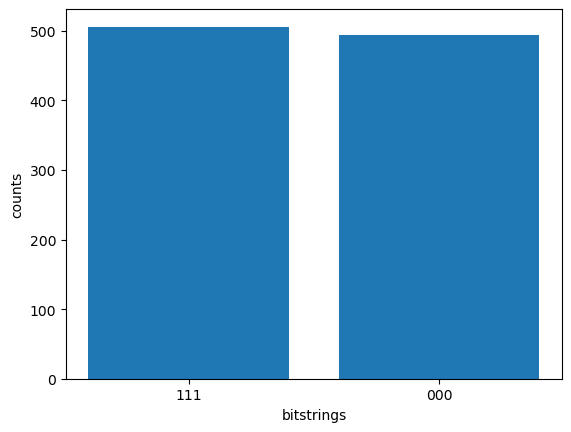

In [5]:
# define the circuit
n_qubits = 3
ghz = prepare_ghz_circuit(n_qubits)
print(ghz)

# define the device to run the circuit on, here we use the LocalSimulator
device = LocalSimulator()

# run the circuit
task = device.run(ghz, shots=1000)

# get the results
result = task.result()
counts = result.measurement_counts
print(counts)

# plot the results
plt.bar(counts.keys(), counts.values())
plt.xlabel('bitstrings')
plt.ylabel('counts')
plt.show()

## using the on-demand simulator SV1

T   : |0|1|2|3|4|5|6|7|8|9|10|11|
                                 
q0  : -H-C-----------------------
         |                       
q1  : ---X-C---------------------
           |                     
q2  : -----X-C-------------------
             |                   
q3  : -------X-C-----------------
               |                 
q4  : ---------X-C---------------
                 |               
q5  : -----------X-C-------------
                   |             
q6  : -------------X-C-----------
                     |           
q7  : ---------------X-C---------
                       |         
q8  : -----------------X-C-------
                         |       
q9  : -------------------X-C-----
                           |     
q10 : ---------------------X--C--
                              |  
q11 : ------------------------X--

T   : |0|1|2|3|4|5|6|7|8|9|10|11|
Counter({'111111111111': 505, '000000000000': 495})


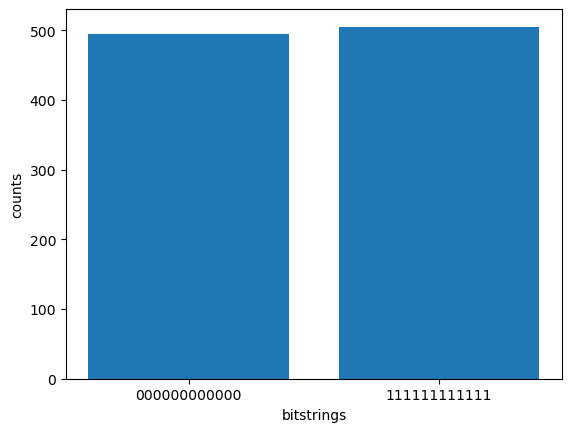

Counts for all-zero bitstring: 495
Counts for all-one bitstring: 505
Number of qubits: 12
the time taken to run the circuit in seconds is:  2


In [6]:
# define the circuit
n_qubits = 12
shots = 1000
ghz = prepare_ghz_circuit(n_qubits)

# set up the on-demand simulator SV1
device = AwsDevice("arn:aws:braket:::device/quantum-simulator/amazon/sv1")

#run the circuit
run_on_device(device=device, circuit=ghz, shots=shots)

## using the on-demand simulator TN1

T   : |0|1|2|3|4|5|6|7|8|9|10|11|12|13|14|15|16|17|18|19|20|21|22|23|24|25|26|27|28|29|30|31|32|33|34|35|36|37|38|39|40|41|42|43|44|45|46|47|48|49|
                                                                                                                                                   
q0  : -H-C-----------------------------------------------------------------------------------------------------------------------------------------
         |                                                                                                                                         
q1  : ---X-C---------------------------------------------------------------------------------------------------------------------------------------
           |                                                                                                                                       
q2  : -----X-C--------------------------------------------------------------------------------------------------

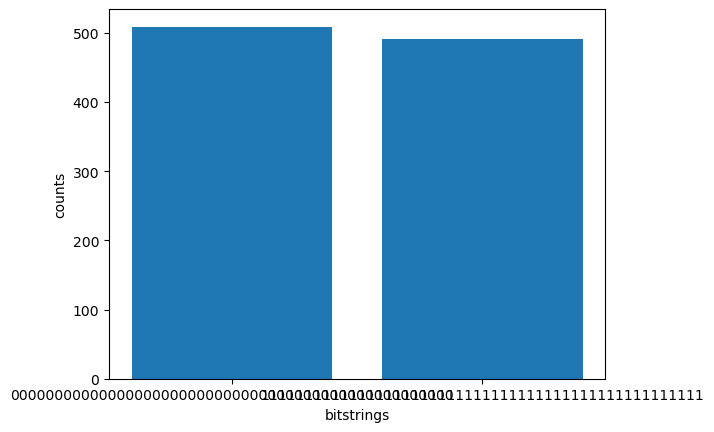

Counts for all-zero bitstring: 509
Counts for all-one bitstring: 491
Number of qubits: 50
the time taken to run the circuit in seconds is:  7


In [7]:
#define the circuit
n_qubits = 50
shots = 1000
ghz = prepare_ghz_circuit(n_qubits)

# set up the on-demand simulator TN1 with larger number of qubits
device = AwsDevice("arn:aws:braket:::device/quantum-simulator/amazon/tn1")

#run the circuit
run_on_device(device=device, circuit=ghz, shots=shots)

## using the on-demand simulator DM1

T   : |0|1|2|3|4|5|6|7|8|9|10|11|12|13|14|15|16|
                                                
q0  : -H-C--------------------------------------
         |                                      
q1  : ---X-C------------------------------------
           |                                    
q2  : -----X-C----------------------------------
             |                                  
q3  : -------X-C--------------------------------
               |                                
q4  : ---------X-C------------------------------
                 |                              
q5  : -----------X-C----------------------------
                   |                            
q6  : -------------X-C--------------------------
                     |                          
q7  : ---------------X-C------------------------
                       |                        
q8  : -----------------X-C----------------------
                         |                      
q9  : --------------

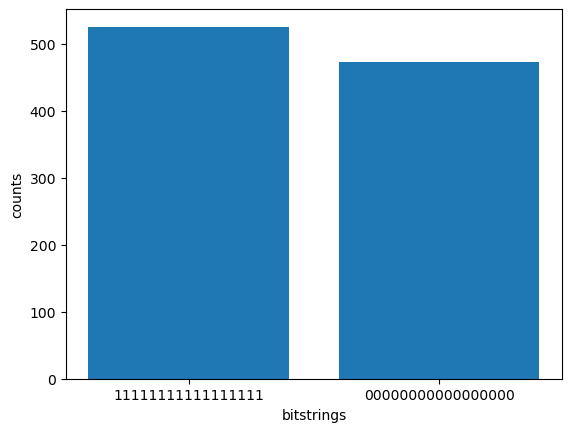

Counts for all-zero bitstring: 474
Counts for all-one bitstring: 526
Number of qubits: 17
the time taken to run the circuit in seconds is:  162


In [8]:
# set up the on-demand simulator DM1 with the max number of allowed qubits on this simulator(17)
device = AwsDevice("arn:aws:braket:::device/quantum-simulator/amazon/dm1")

#define and run the circuit
n_qubits = 17
ghz = prepare_ghz_circuit(n_qubits)

#run the circuit
run_on_device(device=device, circuit=ghz, shots=shots)

In [9]:
print("Task Summary")
print(t.quantum_tasks_statistics())
print(f"Estimated cost to run this example: {t.qpu_tasks_cost() + t.simulator_tasks_cost():.2f} USD")

Task Summary
{'arn:aws:braket:::device/quantum-simulator/amazon/sv1': {'shots': 1000, 'tasks': {'COMPLETED': 1}, 'execution_duration': datetime.timedelta(microseconds=42000), 'billed_execution_duration': datetime.timedelta(seconds=3)}, 'arn:aws:braket:::device/quantum-simulator/amazon/tn1': {'shots': 1000, 'tasks': {'COMPLETED': 1}, 'execution_duration': datetime.timedelta(seconds=5, microseconds=618000), 'billed_execution_duration': datetime.timedelta(seconds=5, microseconds=618000)}, 'arn:aws:braket:::device/quantum-simulator/amazon/dm1': {'shots': 1000, 'tasks': {'COMPLETED': 1}, 'execution_duration': datetime.timedelta(seconds=159, microseconds=438000), 'billed_execution_duration': datetime.timedelta(seconds=159, microseconds=438000)}}
Estimated cost to run this example: 0.23 USD


In [10]:
t.qpu_tasks_cost()

Decimal('0')

In [11]:
t.simulator_tasks_cost()

Decimal('0.2287966666666666666666666667')